# 강의 내용

* Pandas 소개
* Series
* DataFrame
* Indexing

# Pandas

* Python Data Analysis Library
* NumPy를 기반으로 만들어진 패키지
* Label이 붙은 데이터를 위한 편리한 인터페이스 제공
   * 스프레드시트 프로그램 사용자에게 익숙한 환경
* https://pandas.pydata.org/
* Latest version: 1.2.3 (Mar 02, 2021)



# (실습) Pandas 버전 확인

* Pandas를 import 후  __version__으로 확인
* `as` 문을 사용해서 축약어 활용 가능


In [ ]:
import pandas as pd
pd.__version__

'1.1.5'

# Pandas

* NumPy의 ndarray의 한계
   * 데이터에 레이블을 붙이려면 번거로움
   * 누락된 데이터(missing data)로 작업하기 어려움
   * 요소 단위의 브로드캐스팅을 벗어나는 연산이 어려움
      * 그룹화, 피벗 등

* Pandas의 Series와 DataFrame을 사용하여 극복 가능


# Pandas와 Excel의 비교

<img src="https://user-images.githubusercontent.com/39995503/113528170-cab2a500-95fa-11eb-9681-e60d61cdc53f.png" width=500>

# (실습) Series

* NumPy의 구조화된 배열의 확장

* Series의 선언


In [ ]:
import pandas as pd

data = pd.Series([0.25, 0.5, 0.75, 1.0])
print(data)

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64


# Series의 구조

* Series 내부의 데이터는 NumPy 배열을 사용해서 처리



In [ ]:
import pandas as pd

data = pd.Series([0.25, 0.5, 0.75, 1.0])
print(data.values)
print(type(data.values))

[0.25 0.5  0.75 1.  ]
<class 'numpy.ndarray'>


* Index는 별도의 형태로 관리


In [ ]:
import pandas as pd

data = pd.Series([0.25, 0.5, 0.75, 1.0])
print(data.index)
print(type(data.index))

RangeIndex(start=0, stop=4, step=1)
<class 'pandas.core.indexes.range.RangeIndex'>


# Series의 구조

* 1차원의 데이터를 관리

* Python의 dict처럼 index와 value가 연계되어 처리

<img src="https://user-images.githubusercontent.com/39995503/113528491-a86d5700-95fb-11eb-9131-62283a583694.png">

   * data: 실제 값

   * index: 데이터를 접근할 정보

   * dtype: 데이터들의 타입

   * name: Series 인스턴스의 이름

<img src ="https://user-images.githubusercontent.com/39995503/113528508-b4f1af80-95fb-11eb-97d6-ac16ec1a6f67.png" width=200>

# Series의 생성

* Series를 생성하면서 data, index, name 등을 지정 가능
   * 아래의 예시에서는 Index를 지정
   
   <img src = "https://user-images.githubusercontent.com/39995503/113528965-2120e300-95fd-11eb-8b98-31672b889e68.png" width=200>

* Series의 dimension과 shape은 NumPy와 동일한 형식


In [ ]:
import pandas as pd
data = pd.Series([4,5,6], index=['a','b','c'], name = 'Series Data')
print(data.index)
print(data.values)
print(data.name)
print(data.ndim)
print(data.shape)

Index(['a', 'b', 'c'], dtype='object')
[4 5 6]
Series Data
1
(3,)


# Series의 Index

* 연속하지 않은 값들도 사용 가능

* 인덱스를 사용해서 저장된 값에 접근 가능


In [ ]:
import pandas as pd
data = pd.Series([0.25, 0.5, 0.75, 1.0], index=[2, 5, 3, 7], name = 'Series Data')
print(data)
print(data[5])


2    0.25
5    0.50
3    0.75
7    1.00
Name: Series Data, dtype: float64
0.5


# Dictionary와 Series

* Python의 Dictionary로부터 Series 생성 가능
   * Dictionary의 key들이 index로 사용 됨



In [ ]:
import pandas as pd

population_dict = {
    'California': 38332521,
    'Texas': 26448193,
    'New York': 19651127,
    'Florida': 19552860,
    'Illinois': 12882135 }

population = pd.Series(population_dict)
print(population)


California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64


# Dictionary와 Series

* 값을 가져오는 연산의 경우 Dictionary와 Series 모두 동일

* 그러나 Series의 경우 슬라이싱 연산 지원
   * 숫자 기반의 슬라이싱과는 달리 끝 인덱스에 해당하는 값을 포함



In [ ]:
print(population['California'])
print(population['California':'Illinois'])

38332521
California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64


In [ ]:
import pandas as pd
s = pd.Series([0, 1, 2, 3, 4], index=['a', 'b', 'c', 'd', 'e'])
print(s['a':'c'])

a    0
b    1
c    2
dtype: int64


# (실습) Series의 슬라이싱

* 문자열로 슬라이싱을 할 경우 인덱스의 순서는 입력된 순서


In [ ]:
import pandas as pd
s = pd.Series([0, 1, 2, 3, 4], index=['a', 'e', 'b', 'c', 'd'])
print(s['a':'c'])

a    0
e    1
b    2
c    3
dtype: int64


* 숫자로 슬라이싱을 할 경우?


In [ ]:
import pandas as pd
s = pd.Series([0, 1, 2, 3, 4], index=[3, 2, 0, 1, 4])
print(s[1:4])

2    1
0    2
1    3
dtype: int64


# Pandas의 Index

* 배열과 유사하게 동작
   * 표준 인덱싱 표기법을 사용해서 값이나 슬라이스 처리
   * 그러나 내부의 값을 직접 변경 불가



In [ ]:
import pandas as pd
ind = pd.Index([2, 3, 5, 7, 22])
print(ind[1])
print(ind[::2])
ind[1] = 4

3
Int64Index([2, 5, 22], dtype='int64')


TypeError: ignored

# Pandas Index의 활용

* 집합 연산을 활용하여 필요한 index 도출 가능
   * `&`: 교집합 
   * `|`: 합집합
   * `^`: 두 집합의 상대 여집합의 합집합

   <img src="https://user-images.githubusercontent.com/39995503/113531180-06516d00-9603-11eb-82af-e0f8b32f3975.png">


In [ ]:
import pandas as pd
ind_a = pd.Index([1,3,5,7,9])
ind_b = pd.Index([2,3,5,7,11])
print(ind_a & ind_b)
print(ind_a | ind_b)
print(ind_a ^ ind_b)

Int64Index([3, 5, 7], dtype='int64')
Int64Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')
Int64Index([1, 2, 9, 11], dtype='int64')


# Series의 데이터 접근

* Series 이름을 쓸 경우 전체 데이터 반환

* `head( )`: 첫 5개의 행을 반환
* `tail( )`: 마지막 5개의 행을 반환



In [ ]:
import pandas as pd
import numpy as np

data = pd.Series(np.arange(10))
print(data.head())
print(data.tail())

0    0
1    1
2    2
3    3
4    4
dtype: int64
5    5
6    6
7    7
8    8
9    9
dtype: int64


# Series의 데이터 검색

* 데이터의 검색 방법은 Python dictionary의 표현식과 유사
   * ‘in’  구문을 사용하여 ***key***들 중에서 찾고자 하는 값이 있는지 확인


In [ ]:
import pandas as pd
data = pd.Series([0.25, 0.5, 0.75, 1.0], index=['a', 'b', 'c', 'd'], name = 'Series Data')
print('a' in data)
print('e' in data)

True
False


# Series의 데이터 추가

* 데이터를 추가하는 방법도 dictionary와 유사
   * 새로운 key를 지정하고, 해당 키에 값을 저장


In [ ]:
import pandas as pd
data = pd.Series([0.25, 0.5, 0.75, 1.0], index=['a', 'b', 'c', 'd'], name = 'Series Data')
data['e'] = 1.25
print(data)

a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
Name: Series Data, dtype: float64


# 정수 인덱스를 사용할 경우의 해석

* 정수 인덱스를 사용할 경우 혼동이 야기될 가능성 높음
   * 1번을 key로 갖는 value? vs 1번째 value?


In [ ]:
import pandas as pd
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
print(data)
print(data[1]) # 1 as a key (명시적 인덱스)
print(data[1:3]) # 1 as an 0-based index (암묵적 인덱스)

1    a
3    b
5    c
dtype: object
a
3    b
5    c
dtype: object


# 인덱서(loc, iloc, ix)의 활용

* 정수 인덱싱을 사용할 때 발생할 혼선을 방지하기 위하여 인덱싱 방식을 명시 가능
   * 인덱서(indexer) 속성 제공
      * `loc`: 항상 명시적 인덱스를 참조

      * `iloc`: 암묵적인 python 스타일의 인덱스를 참조

      * `ix`: 위의 두 가지 속성의 하이브리드 형태
         * DataFrame 파트 참고


# 인덱서(loc, iloc, ix)의 활용

* `loc` 속성을 사용할 경우 명시적인 key값을 기준으로 함

* 슬라이싱을 할 때도 명시적 key값을 기준으로 처리


In [ ]:
import pandas as pd
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
print(data.loc[1])
print(data.loc[1:3])

a
1    a
3    b
dtype: object


# 인덱서(loc, iloc, ix)의 활용

* `iloc` 속성을 사용할 경우 암묵적인 python 스타일의 인덱스 참조


In [ ]:
import pandas as pd
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
print(data.iloc[1])
print(data.iloc[1:3])

b
3    b
5    c
dtype: object


# DataFrame의 구조

* 여러 개의 Series들이 각각 **column**이 되어 DataFrame에 속하는 형태

<img src="https://user-images.githubusercontent.com/39995503/113532650-dc01ae80-9606-11eb-80d0-0db3c7056a25.png" width=550>


# (실습) DataFrame의 생성

In [ ]:
import pandas as pd

population_dict = {
    'California': 38332521,
    'Texas': 26448193,
    'New York': 19651127,
    'Florida': 19552860,
    'Illinois': 12882135 }
population = pd.Series(population_dict)

area_dict = {
    'California': 432967,
    'Texas': 695662,
    'New York': 141297,
    'Florida': 170312,
    'Illinois': 149995 }
area = pd.Series(area_dict)

states = pd.DataFrame({'population': population, 'area':area})
print(states)

            population    area
California    38332521  432967
Texas         26448193  695662
New York      19651127  141297
Florida       19552860  170312
Illinois      12882135  149995


# DataFrame의 속성

* 각 행에 접근할 수 있는 `index` 속성


In [ ]:
print(states.index)

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')


* 각 Series의 label에 접근할 수 있는 `columns` 속성


In [ ]:
print(states.columns)

Index(['population', 'area'], dtype='object')


* 위의 속성들을 활용하여 행과 열에 모두 접근 가능

# DataFrame의 자료 접근

* Series의 조회

In [ ]:
print(states['area'])

California    432967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64


* NumPy와의 차이점

In [ ]:
import numpy as np
nums = np.array([[1,4,2],[7,5,3]])
print(nums[0])

[1 4 2]


# DataFrame의 다양한 생성 방법

* 단일 Series로부터 구성하기


In [ ]:
import pandas as pd

population_dict = {
    'California': 38332521,
    'Texas': 26448193,
    'New York': 19651127,
    'Florida': 19552860,
    'Illinois': 12882135 }
population = pd.Series(population_dict)
data = pd.DataFrame(population, columns=['population'])
print(data)

            population
California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135


# DataFrame의 다양한 생성 방법

* Dictionary의 List로부터 생성하기
   * 각 dictionary는 DataFrame에서 행이 됨
   *Dictionary의 key는 각 열의 이름에 대응


In [ ]:
import pandas as pd
raw = [{'a':i, 'b':2*i} for i in range(3)]
print(raw)
data = pd.DataFrame(raw)
print(data)
print(data.columns)

[{'a': 0, 'b': 0}, {'a': 1, 'b': 2}, {'a': 2, 'b': 4}]
   a  b
0  0  0
1  1  2
2  2  4
Index(['a', 'b'], dtype='object')


# DataFrame의 다양한 생성 방법

* 일부 key가 누락된 경우의 처리
* NaN: Not a Number
   * 누락된 자리에 채워지는 값으로 "숫자가 아님"을 의미


In [ ]:
import pandas as pd
data = pd.DataFrame([{'a':1, 'b':2}, {'b':3, 'c':4}])
print(data)

     a  b    c
0  1.0  2  NaN
1  NaN  3  4.0


# NaN: Not a Number

* 실수 자료형으로 정의 됨 -> 벡터화된 연산 지원
* 산술 연산이 가능
* `NaN`이 포함된 연산의 결과는 모두 `NaN`


In [ ]:
import numpy as np
val = np.array([1, np.nan, 3, 4])
print(val.dtype)
print(1 + np.nan)
print(0 * np.nan)

float64
nan
nan


# DataFrame의 데이터 추가

* 새로운 column에 대한 key를 지정하면서 값을 대입


In [ ]:
import pandas as pd

population_dict = {
    'California': 38332521,
    'Texas': 26448193,
    'New York': 19651127,
    'Florida': 19552860,
    'Illinois': 12882135 }
population = pd.Series(population_dict)

area_dict = {
    'California': 432967,
    'Texas': 695662,
    'New York': 141297,
    'Florida': 170312,
    'Illinois': 149995 }
area = pd.Series(area_dict)

data = pd.DataFrame({'population': population, 'area':area})
data['density'] = data['population'] / data['area']
print(data)

            population    area     density
California    38332521  432967   88.534510
Texas         26448193  695662   38.018740
New York      19651127  141297  139.076746
Florida       19552860  170312  114.806121
Illinois      12882135  149995   85.883763


# DataFrame: 2차원 배열

* DataFrame에는 2차원 배열 형태로 저장

* 배열에서 접했던 많은 유사한 작업을 처리 가능
   * Ex) `Transpose`


In [ ]:
print(data.T)

              California         Texas  ...       Florida      Illinois
population  3.833252e+07  2.644819e+07  ...  1.955286e+07  1.288214e+07
area        4.329670e+05  6.956620e+05  ...  1.703120e+05  1.499950e+05
density     8.853451e+01  3.801874e+01  ...  1.148061e+02  8.588376e+01

[3 rows x 5 columns]


# DataFrame: 2차원 배열

* **행**에 접근하고 싶을 경우
   * **values 배열**에 단일 인덱스를 전달
   * 인덱스를 전달할 경우 **열**에 저장된 자료 반환



In [ ]:
print(data.values[0])
print(data['area'])

[3.83325210e+07 4.32967000e+05 8.85345096e+01]
California    432967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64


# DataFrame: 2차원 배열

* 앞서 Series와 유사하게 `loc`과 `iloc` 활용 가능


In [ ]:
print(data.iloc[:3, :2])

            population    area
California    38332521  432967
Texas         26448193  695662
New York      19651127  141297


In [ ]:
print(data.loc[:'Illinois',:'population'])

            population
California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135


# DataFrame: 2차원 배열

* 인덱싱을 사용하여 값을 설정 혹은 변경 가능


In [ ]:
data.iloc[0, 2] = 90
print(data)

            population    area     density
California    38332521  432967   90.000000
Texas         26448193  695662   38.018740
New York      19651127  141297  139.076746
Florida       19552860  170312  114.806121
Illinois      12882135  149995   85.883763


# 계층적 인덱싱

* 각 주별로 2000년도와 2010년도의 자료가 있을 경우


In [ ]:
import pandas as pd
import numpy as np
index = [('California', 2000), ('California', 2010), ('New York', 2000), ('New York', 2010), ('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37253956, 18976457, 19378102, 20851820, 25145561]
pop = pd.Series(populations, index=index)
print(pop)

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64


# 계층적 인덱싱

* 위의 구현에서 2010년의 모든 값을 살펴보고자 할 경우?


In [ ]:
print(pop[[i for i in pop.index if i[1] == 2010]])

(California, 2010)    37253956
(New York, 2010)      19378102
(Texas, 2010)         25145561
dtype: int64


* 더 좋은 방법은 없을까요? -> 계층적 인덱싱



# 계층적 인덱싱

* 튜플들로부터 다중 인덱스 생성 가능
* 생성한 다중 인덱스를 활용하여 데이터들을 계층적으로 저장 가능


In [ ]:
import pandas as pd
import numpy as np
index = [('California', 2000), ('California', 2010), ('New York', 2000), ('New York', 2010), ('Texas', 2000), ('Texas', 2010)]
index = pd.MultiIndex.from_tuples(index)
print(index)


MultiIndex([('California', 2000),
            ('California', 2010),
            (  'New York', 2000),
            (  'New York', 2010),
            (     'Texas', 2000),
            (     'Texas', 2010)],
           )


# (실습) 계층적 인덱싱

* 첫 두 열은 다중 인덱스


In [ ]:
import pandas as pd
import numpy as np
index = [('California', 2000), ('California', 2010), ('New York', 2000), ('New York', 2010), ('Texas', 2000), ('Texas', 2010)]
index = pd.MultiIndex.from_tuples(index)
populations = [33871648, 37253956, 18976457, 19378102, 20851820, 25145561]
pop = pd.Series(populations, index=index)
print(pop)

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64


# 계층적 인덱싱

* 계층적 인덱싱된 데이터에 접근하기

In [ ]:
import pandas as pd
import numpy as np
index = [('California', 2000), ('California', 2010), ('New York', 2000), ('New York', 2010), ('Texas', 2000), ('Texas', 2010)]
index = pd.MultiIndex.from_tuples(index)
populations = [33871648, 37253956, 18976457, 19378102, 20851820, 25145561]
pop = pd.Series(populations, index=index)
print(pop[:, 2010])

California    37253956
New York      19378102
Texas         25145561
dtype: int64


# 계층적 인덱싱

* 부분 슬라이싱

In [ ]:
print(pop.loc['California':'New York'])

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
dtype: int64


# 계층적 인덱싱

* Boolean 마스킹

In [ ]:
print(pop>22000000)
print(pop[pop > 22000000])

California  2000     True
            2010     True
New York    2000    False
            2010    False
Texas       2000    False
            2010     True
dtype: bool
California  2000    33871648
            2010    37253956
Texas       2010    25145561
dtype: int64


# Boolean 마스킹의 활용

* 인구가 22,000,000 보다 큰 도시의 면적과 인구 밀도


In [ ]:
import pandas as pd

population_dict = {
    'California': 38332521,
    'Texas': 26448193,
    'New York': 19651127,
    'Florida': 19552860,
    'Illinois': 12882135 }
population = pd.Series(population_dict)

area_dict = {
    'California': 432967,
    'Texas': 695662,
    'New York': 141297,
    'Florida': 170312,
    'Illinois': 149995 }
area = pd.Series(area_dict)

data = pd.DataFrame({'population': population, 'area':area})
data['density'] = data['population'] / data['area']
print(data[data['population'] > 22000000][['area', 'density']])

              area   density
California  432967  88.53451
Texas       695662  38.01874


# Panel의 구조

<img src="https://user-images.githubusercontent.com/39995503/113537357-749e2b80-9613-11eb-8544-73dfdae4cb1f.png" width=600>

# Summary

* Pandas 소개
* Series
* DataFrame
* Indexing

# 강의 내용

* 결측치 탐지 및 처리
* Pandas를 이용한 파일 입출력

# 결측치의 표기

* 누락된 데이터의 표기 방법
   * 공백, null, NaN, NA, …

* (방법 1) 특징적인 값 사용
   * Ex) -9999, NumPy의 NaN (Not a Number), None

* (방법 2) 별도의 Boolean 배열 사용
   * Ex) empty = [True, False, False, True, … ]


# `None`: Python의 누락된 데이터 표현

* Python에서 누락된 자료를 나타낼 수 있는 가장 일반적인 표현 방법
   * `None`

* 단점
   * Python 언어에서 정의된 표현이므로 벡터화된 연산 불가능 
      * 느린 처리 속도
   * 집계 연산 사용시 오류 발생


In [ ]:
import numpy as np
val = np.array([1, None, 3, 4])
print(val)

[1 None 3 4]


In [ ]:
print(val.sum())

TypeError: ignored

# NaN: 누락된 수치형 데이터 표현

* IEEE 부동 소수점 표기를 사용하는 특수 **부동 소수점** 값
* 수치형 표현이므로 벡터화된 연산 가능
* 다만 `NaN`이 포함된 산술 연산의 결과는 또 다른 `NaN`



# Five Groups of Floating Point Numbers

<img src="https://user-images.githubusercontent.com/39995503/92390825-95260600-f156-11ea-9aa8-f3ec1695bcb1.png" width=700>

* Extreme exponent values (`0` and `255`): used to indicate special values
* `NaN`(Not a Number) is used to signal exception conditions

In [ ]:
import numpy as np
val = np.array([1, np.nan, 3, 4])
print(val)
print(val.sum(), val.min(), val.max())
print(1 + np.nan)
print(0 * np.nan)

[ 1. nan  3.  4.]
nan nan nan
nan
nan


# NumPy에서의 NaN 처리

* 누락된 값을 무시하는 별도의 집계 연산 제공

* 주의사항
   * 정수나 문자열 등에서는 `NaN`에 해당하는 값이 없음



In [ ]:
import numpy as np
val = np.array([1, np.nan, 3, 4])
print(val)
print(np.nansum(val), np.nanmin(val), np.nanmax(val))

[ 1. nan  3.  4.]
8.0 1.0 4.0


# Pandas에서의 NaN과 None

* Pandas에서는 `NaN`과 `None`이 거의 호환되며, 적절하게 서로 변환할 수 있게 설계 됨
   * None -> NaN
   * 정수 -> 실수



In [ ]:
import numpy as np
import pandas as pd
val = pd.Series([1, np.nan, 2, None])
print(val)

0    1.0
1    1.0
2    2.0
3    NaN
dtype: float64


# Pandas에서의 NaN과 None

* NaN과 None의 자동 변화 사례
   * None -> NaN으로 자동 변환
   * NaN이 포함되면서 int 자료형이 float 자료형으로 변환
   

In [ ]:
import numpy as np
import pandas as pd
x = pd.Series(range(2), dtype=int)
print(x)
x[0] = None
print(x)

0    0
1    1
dtype: int64
0    NaN
1    1.0
dtype: float64


# Pandas에서의 결측치 처리

* 비어있는 값을 감지하고 삭제하고 대체하는 함수 제공

* `isnull( )`
   * 누락된 값들을 가리키는 Boolean 마스크 생성
* `notnull( )`
   * isnull( ) 함수의 역
* `dropna( )`
   * 데이터에서 비어있는 값을 제거하여 반환
* `fillna( )`
   * 누락된 값을 채운 배열의 사본을 반환


# Pandas에서의 결측치 탐지

* `isnull( )`과 `notnull( )` 함수의 사용
* Boolean 배열을 인덱스로 직접 사용 가능


In [ ]:
import numpy as np
import pandas as pd
data = pd.Series([1, np.nan, 'hello', None])
print(data.isnull())
print(data.notnull())
print(data[data.notnull()])

0    False
1     True
2    False
3     True
dtype: bool
0     True
1    False
2     True
3    False
dtype: bool
0        1
2    hello
dtype: object


# Pandas에서의 결측치 제거 (1)

* `dropna( )` 함수 사용
   * Series에 대해서는 직관적으로 적용 가능
   * DataFrame에서는 단일 값만 삭제할 수 없기 때문에 전체 행이나 전체 열을 삭제



In [ ]:
import numpy as np
import pandas as pd
data = pd.Series([1, np.nan, 'hello', None])
print(data.dropna())


0        1
2    hello
dtype: object


# Pandas에서의 결측치 제거 (2)

* DataFrame에서의 `dropna( )` 
   * 결측치가 있는 모든 행을 삭제


In [ ]:
import numpy as np
import pandas as pd
df = pd.DataFrame([[1, np.nan, 2],
                   [2, 3, 5],
                   [np.nan, 4, 6]])
print(df)
print(df.dropna())

     0    1  2
0  1.0  NaN  2
1  2.0  3.0  5
2  NaN  4.0  6
     0    1  2
1  2.0  3.0  5


# Pandas에서의 결측치 제거 (3)

* `dropna( )`와 축의 지정
* `axis=1`로 지정할 경우, 결측치가 있는 모든 열을 삭제


In [ ]:
import numpy as np
import pandas as pd
df = pd.DataFrame([[1, np.nan, 2],
                   [2, 3, 5],
                   [np.nan, 4, 6]])
print(df)
print(df.dropna(axis=1))

     0    1  2
0  1.0  NaN  2
1  2.0  3.0  5
2  NaN  4.0  6
   2
0  2
1  5
2  6


# Pandas에서의 결측치 제거 (4)

* 일반적인 `dropna( )`는 일부 유효한 데이터도 모두 삭제
* `how`를 지정하여 옵션 변경 가능
   * `any`: 기본 옵션
   * `all`: 모두 빈 경우


In [ ]:
import numpy as np
import pandas as pd
df = pd.DataFrame([[1, np.nan, 2],
                   [2, 3, 5],
                   [np.nan, 4, 6]])
df[3] = np.nan # broadcasting
print(df)
print(df.dropna(axis=1, how='all'))

     0    1  2   3
0  1.0  NaN  2 NaN
1  2.0  3.0  5 NaN
2  NaN  4.0  6 NaN
   2
0  2
1  5
2  6


# Pandas에서의 결측치 제거 (5)

* `dropna( )`에 `threshold`를 지정하여 세부적으로 제어 가능
   * 비어있지 않은 값이 최소 몇 개가 있어야 하는지 지정


In [ ]:
import numpy as np
import pandas as pd
df = pd.DataFrame([[1, np.nan, 2],
                   [2, 3, 5],
                   [np.nan, 4, 6]])
df[3] = np.nan # broadcasting
print(df)
print(df.dropna(axis=0, thresh=3))

     0    1  2   3
0  1.0  NaN  2 NaN
1  2.0  3.0  5 NaN
2  NaN  4.0  6 NaN
     0    1  2   3
1  2.0  3.0  5 NaN


# Pandas에서의 결측치 채우기 (1)

* 비어있는 값을 삭제하지 않고 유효한 값으로 대체해야 하는 경우 
   * `fillna( )` 함수 사용 가능


In [ ]:
import numpy as np
import pandas as pd
data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
print(data)
print(data.fillna(0))

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64
a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64


# Pandas에서의 결측치 채우기 (2)

* `fillna( )` 함수를 이용하여 **이전 값**으로 채우기
   * `method`를 '`ffill`'로 지정


In [ ]:
import numpy as np
import pandas as pd
data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
print(data)
print(data.fillna(method='ffill'))

a    1.0
b    NaN
c    2.0
d    NaN
e    NaN
dtype: float64
a    1.0
b    1.0
c    2.0
d    2.0
e    2.0
dtype: float64


# Pandas에서의 결측치 채우기 (3)

* `fillna( )` 함수에서 **다음 값**으로 채우기
   * `method`를 '`bfill`'로 지정


In [ ]:
import numpy as np
import pandas as pd
data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
print(data)
print(data.fillna(method='bfill'))

a    1.0
b    NaN
c    2.0
d    NaN
e    NaN
dtype: float64
a    1.0
b    2.0
c    2.0
d    NaN
e    NaN
dtype: float64


# Pandas에서의 결측치 채우기 (4)

* DataFrame에서의 `fillna( )` 함수 사용 시 축 지정 가능
   * 아래의 경우 바로 앞 열에 있는 값으로 채움
   * 이전 값을 사용할 수 없는 경우 `NaN` 값은 그대로 유지


In [ ]:
import numpy as np
import pandas as pd
df = pd.DataFrame([[1, np.nan, 2],
                   [2, 3, 5],
                   [np.nan, 4, 6]])
df[3] = np.nan # broadcasting
print(df)
print(df.fillna(method='ffill', axis=1))

     0    1  2   3
0  1.0  NaN  2 NaN
1  2.0  3.0  5 NaN
2  NaN  4.0  6 NaN
     0    1    2    3
0  1.0  1.0  2.0  2.0
1  2.0  3.0  5.0  5.0
2  NaN  4.0  6.0  6.0


# Pandas에서의 결측치 채우기 (5)

* `interpolate()` 함수 이용
   * Fill `NaN` values using an interpolation method


In [ ]:
import numpy as np
import pandas as pd
s = pd.Series([0, 1, np.nan, 3])
print(s)
print(s.interpolate())  # linear interpolation (y=ax+b)


0    0.0
1    1.0
2    NaN
3    3.0
dtype: float64
0    0.0
1    1.0
2    2.0
3    3.0
dtype: float64


In [ ]:
import numpy as np
import pandas as pd
s = pd.Series([0, 2, np.nan, 8])
print(s)
print(s.interpolate(method='polynomial', order=2)) # polynorminal interpolation (y=ax^2+bx+c)


0    0.0
1    2.0
2    NaN
3    8.0
dtype: float64
0    0.000000
1    2.000000
2    4.666667
3    8.000000
dtype: float64


# Pandas를 이용한 파일 입력

* 미국의 출생률 데이터 (births.csv)
   * https://goo.gl/CQ8jMQ

<img src = "https://user-images.githubusercontent.com/39995503/113560155-83013d00-963d-11eb-94ed-46ba8a8954e9.png" width=700>


# Pandas를 이용한 파일 입력

* CSV 파일 입력
   * `read_csv` 함수 이용
   

In [ ]:
import pandas as pd
url='https://raw.githubusercontent.com/JaeyoungKim-HCIL/NPEX_AI_Lecture/main/births.csv'
births = pd.read_csv(url)
print(births.head())  # 첫 5줄 출력

   year  month  day gender  births
0  1969      1  1.0      F    4046
1  1969      1  1.0      M    4440
2  1969      1  2.0      F    4454
3  1969      1  2.0      M    4548
4  1969      1  3.0      F    4548


# Pandas를 이용한 파일 입력

* 미국의 출생률 데이터 + 파일 소개 (births_a.csv)
   * 파일의 처음에 부연 설명이 있는 행 존재


In [ ]:
import pandas as pd
url='https://raw.githubusercontent.com/JaeyoungKim-HCIL/NPEX_AI_Lecture/main/births_a.csv'
births = pd.read_csv(url)
print(births.head())  # 첫 5줄 출력

  Center for Disease Control birth data Unnamed: 1  ... Unnamed: 3 Unnamed: 4
0                                  year      month  ...     gender     births
1                                  1969          1  ...          F       4046
2                                  1969          1  ...          M       4440
3                                  1969          1  ...          F       4454
4                                  1969          1  ...          M       4548

[5 rows x 5 columns]


* 건너뛰어야 할 행이 있을 경우 skiprows 지정

In [ ]:
import pandas as pd
url='https://raw.githubusercontent.com/JaeyoungKim-HCIL/NPEX_AI_Lecture/main/births_a.csv'
births = pd.read_csv(url, skiprows=[0])
print(births.head())  # 첫 5줄 출력

   year  month  day gender  births
0  1969      1  1.0      F    4046
1  1969      1  1.0      M    4440
2  1969      1  2.0      F    4454
3  1969      1  2.0      M    4548
4  1969      1  3.0      F    4548


# Pandas를 이용한 파일 입력

* Excel 파일의 처리
   * `read_excel( )` 함수 사용
      * sheet_name으로 읽어들일 sheet의 이름 지정 

* 예제 파일 (Niaaa-report.xlsx)


In [ ]:
import pandas as pd
url='https://github.com/JaeyoungKim-HCIL/NPEX_AI_Lecture/blob/main/niaaa-report.xlsx?raw=true'
df = pd.read_excel(url, sheet_name='niaaa-report')
print(df.head())

     State  Year  Beer  Wine  Spirits
0  Alabama  1977  0.99  0.13     0.84
1  Alabama  1978  0.98  0.12     0.88
2  Alabama  1979  0.98  0.12     0.84
3  Alabama  1980  0.96  0.16     0.74
4  Alabama  1981  1.00  0.19     0.73


# Pandas를 이용한 파일 출력

* DataFrame에 대해서 csv 파일로 바로 저장 가능
   * `to_csv( )` 함수 사용

```
import pandas as pd
births = pd.read_csv('births_a.csv', skiprows=[0])
births.to_csv('births_b.csv')
```

* 위의 예제에서는 `births_a.csv`의 설명행을 제외한 나머지 데이터를 `births_b.csv`에 저장



In [ ]:
import pandas as pd
url='https://raw.githubusercontent.com/JaeyoungKim-HCIL/NPEX_AI_Lecture/main/births_a.csv'
births = pd.read_csv(url, skiprows=[0])
births.to_csv('births_b.csv')

from google.colab import files
files.download('births_b.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Pandas를 이용한 파일 출력

* DataFrame에 대해서 excel 파일로도 바로 저장 가능
   * `ExcelWriter`를 선언하여 저장할 파일 지정
   * `to_excel( )` 함수를 사용

```
import pandas as pd
births = pd.read_csv('births_a.csv', skiprows=[0])
writer = pd.ExcelWriter('output.xlsx')
births.to_excel(writer, 'Sheet1')
writer.save()
```

   * `ExcelWriter`의 `save( )` 함수를 사용해서 내용 저장


In [ ]:
import pandas as pd
url='https://raw.githubusercontent.com/JaeyoungKim-HCIL/NPEX_AI_Lecture/main/births_a.csv'
births = pd.read_csv(url, skiprows=[0])
writer = pd.ExcelWriter('output.xlsx')
births.to_excel(writer, 'Sheet1')
writer.save()

from google.colab import files
files.download('output.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Summary

* Pandas를 활용한 결측 데이터 처리
   * 결측 데이터 검색
   * 결측 데이터 제거
   * 결측 데이터 채우기

* Pandas를 이용한 파일 입출력

# 강의 내용

* 스택킹(stacking)과 피보팅(pivoting)

* 데이터 결합과 조인

* 데이터 정렬

* 데이터 집계 함수

* 데이터 변환



# Data Wrangling

* 원자료(raw data)를 또 다른 형태로 가공하는 것
   * 2개의 서로 다른 데이터를 연결
      * 이종 데이터의 병합
      * 데이터 간에 겹치는 부분의 처리

   * 데이터 전처리
   * 데이터 정리(cleansing)
      * 결측값의 처리
   * 데이터 변환(transformation)


# (실습) DataFrame의 생성


In [ ]:
import pandas as pd
import numpy as np

def make_df(cols, ind):
  data = {c: [str(c) + str(i) for i in ind] for c in cols}
  return pd.DataFrame(data, ind)

make_df('ABC', range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


# 실습용 데이터

* 미국 국립 알코올 남용 및 중독 연구소(NIAAA) 자료
   * niaaa-report2009.csv
      * https://raw.githubusercontent.com/JaeyoungKim-HCIL/NPEX_AI_Lecture/main/
   * niaaa-report.xlsx 
      * https://github.com/JaeyoungKim-HCIL/NPEX_AI_Lecture/blob/main/niaaa-report.xlsx?raw=true

* 미국 인구통계 데이터 (2016년 2월 기준)
   * population.csv
      * https://raw.githubusercontent.com/JaeyoungKim-HCIL/NPEX_AI_Lecture/main/population.csv




# 실습용 데이터 읽기 (1)

* Excel 파일 열기
   * 예제 파일 (Niaaa-report.xlsx)


In [ ]:
import pandas as pd
url='https://github.com/JaeyoungKim-HCIL/NPEX_AI_Lecture/blob/main/niaaa-report.xlsx?raw=true'
df = pd.read_excel(url, sheet_name='niaaa-report')
print(df.head())

     State  Year  Beer  Wine  Spirits
0  Alabama  1977  0.99  0.13     0.84
1  Alabama  1978  0.98  0.12     0.88
2  Alabama  1979  0.98  0.12     0.84
3  Alabama  1980  0.96  0.16     0.74
4  Alabama  1981  1.00  0.19     0.73


# 복습 - 계층적 인덱싱

In [ ]:
import pandas as pd
import numpy as np
index = [('California', 2000), ('California', 2010), ('New York', 2000), ('New York', 2010), ('Texas', 2000), ('Texas', 2010)]
index = pd.MultiIndex.from_tuples(index)
populations = [33871648, 37253956, 18976457, 19378102, 20851820, 25145561]
pop = pd.Series(populations, index=index)
print(pop)

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64


# 실습용 데이터 읽기 (2)

* 열 이름을 계층화하여 읽기


In [ ]:
import pandas as pd
url='https://github.com/JaeyoungKim-HCIL/NPEX_AI_Lecture/blob/main/niaaa-report.xlsx?raw=true'
df = pd.read_excel(url, sheet_name='niaaa-report', index_col=[0, 1]) 
# If a list is passed as index_col, those columns will be combined into a MultiIndex
print(df.head())

              Beer  Wine  Spirits
State   Year                     
Alabama 1977  0.99  0.13     0.84
        1978  0.98  0.12     0.88
        1979  0.98  0.12     0.84
        1980  0.96  0.16     0.74
        1981  1.00  0.19     0.73
        1982  1.00  0.18     0.72
        1983  1.01  0.17     0.71
        1984  1.02  0.19     0.69
        1985  1.06  0.17     0.67
        1986  1.09  0.18     0.64
        1987  1.10  0.18     0.61
        1988  1.10  0.18     0.61
        1989  1.10  0.17     0.60
        1990  1.12  0.18     0.61
        1991  1.00  0.17     0.59
        1992  1.02  0.19     0.59
        1993  1.14  0.17     0.56
        1994  1.16  0.17     0.54
        1995  1.14  0.15     0.53
        1996  1.17  0.15     0.53
        1997  1.14  0.15     0.52
        1998  1.16  0.17     0.51
        1999  1.18  0.17     0.51
        2000  1.19  0.18     0.51
        2001  1.16  0.17     0.53
        2002  1.18  0.21     0.53
        2003  1.18  0.19     0.52
        2004  

# Stacking and Unstacking

<img src="https://user-images.githubusercontent.com/39995503/113574214-9bca1c80-9656-11eb-8c8e-bb459ad9f2de.png" width=600>

# Stacking

* Stack the prescribed level(s) from columns to index.

<img src="https://user-images.githubusercontent.com/39995503/113532650-dc01ae80-9606-11eb-80d0-0db3c7056a25.png" width=550>

In [ ]:
df_single_level_cols = pd.DataFrame([[0, 1], [2, 3]],
                                    index=['cat', 'dog'],
                                    columns=['weight', 'height'])
print(df_single_level_cols)
print(df_single_level_cols.stack())

     weight  height
cat       0       1
dog       2       3
cat  weight    0
     height    1
dog  weight    2
     height    3
dtype: int64


# (실습) Stacking

In [ ]:
import pandas as pd
url='https://github.com/JaeyoungKim-HCIL/NPEX_AI_Lecture/blob/main/niaaa-report.xlsx?raw=true'
df = pd.read_excel(url, sheet_name='niaaa-report', index_col=[0, 1]) 
# If a list is passed as index_col, those columns will be combined into a MultiIndex
print(df.head())
tall_df = df.stack() 
tall_df.index.names = ['State', 'Year', 'Drink']
print(tall_df.head(10))

              Beer  Wine  Spirits
State   Year                     
Alabama 1977  0.99  0.13     0.84
        1978  0.98  0.12     0.88
        1979  0.98  0.12     0.84
        1980  0.96  0.16     0.74
        1981  1.00  0.19     0.73
State    Year  Drink  
Alabama  1977  Beer       0.99
               Wine       0.13
               Spirits    0.84
         1978  Beer       0.98
               Wine       0.12
               Spirits    0.88
         1979  Beer       0.98
               Wine       0.12
               Spirits    0.84
         1980  Beer       0.96
dtype: float64


# (실습) 언스택킹(unstacking)

In [ ]:
import pandas as pd
url='https://github.com/JaeyoungKim-HCIL/NPEX_AI_Lecture/blob/main/niaaa-report.xlsx?raw=true'
df = pd.read_excel(url, sheet_name='niaaa-report', index_col=[0, 1]) 
# If a list is passed as index_col, those columns will be combined into a MultiIndex
print(df.head(10))
wide_df = df.unstack()
print(wide_df.head(10))

              Beer  Wine  Spirits
State   Year                     
Alabama 1977  0.99  0.13     0.84
        1978  0.98  0.12     0.88
        1979  0.98  0.12     0.84
        1980  0.96  0.16     0.74
        1981  1.00  0.19     0.73
        1982  1.00  0.18     0.72
        1983  1.01  0.17     0.71
        1984  1.02  0.19     0.69
        1985  1.06  0.17     0.67
        1986  1.09  0.18     0.64
                      Beer                    ... Spirits                  
Year                  1977  1978  1979  1980  ...    2006  2007  2008  2009
State                                         ...                          
Alabama               0.99  0.98  0.98  0.96  ...    0.55  0.56  0.58  0.58
Alaska                1.19  1.39  1.50  1.55  ...    1.02  1.07  1.09  1.16
Arizona               1.70  1.77  1.86  1.69  ...    0.78  0.76  0.75  0.74
Arkansas              0.92  0.97  0.93  1.00  ...    0.59  0.60  0.60  0.60
California            1.31  1.36  1.42  1.42  ...    0.70  0

# (참고) 결과를 엑셀로 저장하기

```
import pandas as pd
url='https://github.com/JaeyoungKim-HCIL/NPEX_AI_Lecture/blob/main/niaaa-report.xlsx?raw=true'
df = pd.read_excel(url, sheet_name='niaaa-report', index_col=[0, 1]) 
# If a list is passed as index_col, those columns will be combined into a MultiIndex

wide_df = df.unstack()
writer = pd.ExcelWriter('output.xlsx')
wide_df.to_excel(writer, 'Sheet1')
writer.save()
```

# (실습) Stacking and Unstacking

In [ ]:
import pandas as pd
url='https://github.com/JaeyoungKim-HCIL/NPEX_AI_Lecture/blob/main/niaaa-report.xlsx?raw=true'
df = pd.read_excel(url, sheet_name='niaaa-report', index_col=[0, 1]) 
# If a list is passed as index_col, those columns will be combined into a MultiIndex
print(df.head(10))
tall_df = df.stack() 
tall_df.index.names = ['State', 'Year', 'Drink']
print(tall_df.head(10))
print(tall_df.unstack().head(10))

              Beer  Wine  Spirits
State   Year                     
Alabama 1977  0.99  0.13     0.84
        1978  0.98  0.12     0.88
        1979  0.98  0.12     0.84
        1980  0.96  0.16     0.74
        1981  1.00  0.19     0.73
        1982  1.00  0.18     0.72
        1983  1.01  0.17     0.71
        1984  1.02  0.19     0.69
        1985  1.06  0.17     0.67
        1986  1.09  0.18     0.64
State    Year  Drink  
Alabama  1977  Beer       0.99
               Wine       0.13
               Spirits    0.84
         1978  Beer       0.98
               Wine       0.12
               Spirits    0.88
         1979  Beer       0.98
               Wine       0.12
               Spirits    0.84
         1980  Beer       0.96
dtype: float64
Drink         Beer  Wine  Spirits
State   Year                     
Alabama 1977  0.99  0.13     0.84
        1978  0.98  0.12     0.88
        1979  0.98  0.12     0.84
        1980  0.96  0.16     0.74
        1981  1.00  0.19     0.73
      

# Pivoting

* 스택킹과 언스택킹의 일반화된 연산

* pivot(index, columns, values)
   * Index
      * 새로운 인덱스로 사용할 열
   * Columns
      * 새로운 열 이름 리스트
   * Values
      * 데이터프레임을 채울 데이터


# (실습) Pivoting

In [ ]:
import pandas as pd
url='https://github.com/JaeyoungKim-HCIL/NPEX_AI_Lecture/blob/main/niaaa-report.xlsx?raw=true'
df = pd.read_excel(url, sheet_name='niaaa-report')
print(df.head())
dfp = df.pivot('Year', 'State', 'Wine')
print(dfp.head(10))

     State  Year  Beer  Wine  Spirits
0  Alabama  1977  0.99  0.13     0.84
1  Alabama  1978  0.98  0.12     0.88
2  Alabama  1979  0.98  0.12     0.84
3  Alabama  1980  0.96  0.16     0.74
4  Alabama  1981  1.00  0.19     0.73
State  Alabama  Alaska  Arizona  ...  West Virginia  Wisconsin  Wyoming
Year                             ...                                   
1977      0.13    0.42     0.34  ...           0.09       0.27     0.21
1978      0.12    0.45     0.37  ...           0.09       0.28     0.22
1979      0.12    0.47     0.39  ...           0.09       0.28     0.22
1980      0.16    0.50     0.36  ...           0.09       0.31     0.24
1981      0.19    0.57     0.42  ...           0.14       0.31     0.24
1982      0.18    0.56     0.40  ...           0.14       0.30     0.24
1983      0.17    0.61     0.44  ...           0.13       0.33     0.22
1984      0.19    0.58     0.45  ...           0.12       0.30     0.22
1985      0.17    0.58     0.46  ...           0.13 

# 실습용 데이터 읽기 (3)

* niaaa-report2009.csv 파일 읽기


In [ ]:
import pandas as pd
url='https://raw.githubusercontent.com/JaeyoungKim-HCIL/NPEX_AI_Lecture/main/niaaa-report2009.csv'
alco2009 = pd.read_csv(url, index_col='State')
print(alco2009.head())

            Beer  Wine  Spirits
State                          
Alabama     1.20  0.22     0.58
Alaska      1.31  0.54     1.16
Arizona     1.19  0.38     0.74
Arkansas    1.07  0.17     0.60
California  1.05  0.55     0.73


In [ ]:
alco2009 = pd.read_csv(url)
print(alco2009.head())

        State  Beer  Wine  Spirits
0     Alabama  1.20  0.22     0.58
1      Alaska  1.31  0.54     1.16
2     Arizona  1.19  0.38     0.74
3    Arkansas  1.07  0.17     0.60
4  California  1.05  0.55     0.73


# 인덱스의 초기화

* `reset_index( )` 함수
   * 기존 인덱스의 지정 취소 및 초기화


In [ ]:
import pandas as pd
url='https://raw.githubusercontent.com/JaeyoungKim-HCIL/NPEX_AI_Lecture/main/niaaa-report2009.csv'
alco2009 = pd.read_csv(url, index_col='State')
print(alco2009.head())
print(alco2009.reset_index().head())

            Beer  Wine  Spirits
State                          
Alabama     1.20  0.22     0.58
Alaska      1.31  0.54     1.16
Arizona     1.19  0.38     0.74
Arkansas    1.07  0.17     0.60
California  1.05  0.55     0.73
        State  Beer  Wine  Spirits
0     Alabama  1.20  0.22     0.58
1      Alaska  1.31  0.54     1.16
2     Arizona  1.19  0.38     0.74
3    Arkansas  1.07  0.17     0.60
4  California  1.05  0.55     0.73


# 실습용 데이터 읽기 (4)

In [ ]:
import pandas as pd
url='https://raw.githubusercontent.com/JaeyoungKim-HCIL/NPEX_AI_Lecture/main/niaaa-report2009.csv'
alco2009 = pd.read_csv(url, index_col='State')
print(alco2009.head())
url='https://raw.githubusercontent.com/JaeyoungKim-HCIL/NPEX_AI_Lecture/main/population.csv'
population = pd.read_csv(url, index_col='State')
print(population.head())


            Beer  Wine  Spirits
State                          
Alabama     1.20  0.22     0.58
Alaska      1.31  0.54     1.16
Arizona     1.19  0.38     0.74
Arkansas    1.07  0.17     0.60
California  1.05  0.55     0.73
            Population
State                 
Alabama      4,780,131
Alaska         710,249
Arizona      6,392,301
Arkansas     2,916,025
California  37,254,522


# 복습 - NumPy 배열의 결합

* `concatenate( )` 함수의 사용


In [ ]:
import numpy as np
x = [1,2,3]
y = [4,5,6]
z = [7,8,9]
np.concatenate([x,y,z])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

* 축 방향의 지정 (axis 값 설정)

In [ ]:
import numpy as np
x = [[1,2],[3,4]]
np.concatenate([x,x], axis=1)

array([[1, 2],
       [3, 4],
       [1, 2],
       [3, 4]])

# Pandas에서의 결합

* 결합을 위해 `merge` 함수 사용
   * 두 데이터 프레임에서 이름이 같은 열이 있는 경우
      * `merge( df1, df2, on="key" )`

   * 각 데이터 프레임에서 열을 지정하는 경우
      * `merge( df1, df2, left_on="key1", right_on="key2" )`


# Pandas에서의 결합

* 일대일(1:1) 결합
   * 왼쪽 DataFrame의 각 행이 오른쪽 DataFrame의 각 행에 하나씩만 매칭되는 경우

* 일대다(1:N) 결합
   * 왼쪽 DataFrame의 각 행이 2개 이상의 오른쪽 행에 매칭되는 경우
      * 왼쪽에 있는 행을 필요한 만큼 복제하고, 복제한만큼 행이 중복 됨

* 다대다(N:M) 결합
   * 양쪽에서 필요한 만큼 행을 복제하고, 빈 곳에는 np.nan 삽입



# Pandas에서의 결합

In [ ]:
import pandas as pd

left = pd.DataFrame(
     {
         "key": ["K0", "K1", "K2", "K3"],
         "A": ["A0", "A1", "A2", "A3"],
         "B": ["B0", "B1", "B2", "B3"],
     }
 )
 
right = pd.DataFrame(
     {
         "key": ["K0", "K1", "K2", "K3"],
         "C": ["C0", "C1", "C2", "C3"],
         "D": ["D0", "D1", "D2", "D3"],
     }
 )
 
result = pd.merge(left, right, on="key")

<img src="https://pandas.pydata.org/docs/_images/merging_merge_on_key.png">

# Join의 처리

* 아래와 같이 2개의 데이터가 있는 경우를 가정
   * 일대다 결합: 왼쪽의 고객 정보를 필요한만큼 복제

<img src="https://user-images.githubusercontent.com/39995503/113577926-04b49300-965d-11eb-9ec8-a88da25476c3.png" width=600>


In [ ]:
import pandas as pd

left = pd.DataFrame(
     {
         "id": ["1", "2", "3", "4"],
         "name": ["park", "kim", "chang", "choo"],
         "tel": ["5", "6", "7", "8"],
     }
 )
 
right = pd.DataFrame(
     {
         "id": ["1", "1", "2", "3", "4", "1", "4"],
         "bid": ["1", "2", "5", "2", "4", "3", "3"],
         "price": ["7000", "13000", "8000", "13000","35000","22000","22000"],
     }
 )

result = pd.merge(left, right, how='right', on="id")
print(result)
result = pd.merge(left, right, how='left', on="id")
print(result)

  id   name tel bid  price
0  1   park   5   1   7000
1  1   park   5   2  13000
2  1   park   5   3  22000
3  2    kim   6   5   8000
4  3  chang   7   2  13000
5  4   choo   8   4  35000
6  4   choo   8   3  22000
  id   name tel bid  price
0  1   park   5   1   7000
1  1   park   5   2  13000
2  1   park   5   3  22000
3  2    kim   6   5   8000
4  3  chang   7   2  13000
5  4   choo   8   4  35000
6  4   choo   8   3  22000


# Join의 처리

* 외부 조인 (outer join)

<img src="https://user-images.githubusercontent.com/39995503/113578331-991ef580-965d-11eb-93a5-e02e36eafcf6.png" width=700>

# 결합 방법의 조정

* `join( )`과 `merge( )` 함수 모두 결합 옵션인 `how`를 지정 가능
   * `left`: 왼쪽에 있는 DataFrame 인덱스를 기준으로 사용
   * `right`: 오른쪽에 있는 DataFrame 인덱스를 기준으로 사용
   * `outer`: 왼쪽과 오른쪽 DataFrame 인덱스들의 **합집합**을 기준으로 사용
   * `inner`: 왼쪽과 오른쪽 DataFrame 인덱스들의 **교집합**을 기준으로 사용


<img src="https://user-images.githubusercontent.com/39995503/113711016-65a49f80-971f-11eb-8cc6-4bf2b3f69491.png">

# `how` = 'inner' by default

In [ ]:
import pandas as pd

left = pd.DataFrame(
    {
         "key1": ["K0", "K0", "K1", "K2"],
         "key2": ["K0", "K1", "K0", "K1"],
         "A": ["A0", "A1", "A2", "A3"],
         "B": ["B0", "B1", "B2", "B3"],
     }
 )

right = pd.DataFrame(
     {
         "key1": ["K0", "K1", "K1", "K2"],
         "key2": ["K0", "K0", "K0", "K0"],
         "C": ["C0", "C1", "C2", "C3"],
         "D": ["D0", "D1", "D2", "D3"],
     }
 )
 

result = pd.merge(left, right, on=["key1", "key2"])
print(result)

  key1 key2   A   B   C   D
0   K0   K0  A0  B0  C0  D0
1   K1   K0  A2  B2  C1  D1
2   K1   K0  A2  B2  C2  D2


<img src="https://pandas.pydata.org/docs/_images/merging_merge_on_key_multiple.png">

In [ ]:
result = pd.merge(left, right, how='left', on=["key1", "key2"])
print(result)

  key1 key2   A   B    C    D
0   K0   K0  A0  B0   C0   D0
1   K0   K1  A1  B1  NaN  NaN
2   K1   K0  A2  B2   C1   D1
3   K1   K0  A2  B2   C2   D2
4   K2   K1  A3  B3  NaN  NaN


<img src="https://pandas.pydata.org/docs/_images/merging_merge_on_key_left.png">

In [ ]:
result = pd.merge(left, right, how='right', on=["key1", "key2"])
print(result)

<img src="https://pandas.pydata.org/docs/_images/merging_merge_on_key_right.png">

In [ ]:
result = pd.merge(left, right, how='outer', on=["key1", "key2"])
print(result)

<img src="https://pandas.pydata.org/docs/_images/merging_merge_on_key_outer.png">

# (실습) DataFrame간의 결합

In [ ]:
import pandas as pd
url='https://raw.githubusercontent.com/JaeyoungKim-HCIL/NPEX_AI_Lecture/main/niaaa-report2009.csv'
alco2009 = pd.read_csv(url, index_col='State')

url='https://raw.githubusercontent.com/JaeyoungKim-HCIL/NPEX_AI_Lecture/main/population.csv'
population = pd.read_csv(url, index_col='State')

df = pd.merge(alco2009, population, on='State')
df.head()

,Beer,Wine,Spirits,Population
State,,,,
Alabama,1.20,0.22,0.58,"4,780,131"
Alaska,1.31,0.54,1.16,"710,249"
Arizona,1.19,0.38,0.74,"6,392,301"
Arkansas,1.07,0.17,0.60,"2,916,025"
California,1.05,0.55,0.73,"37,254,522"


# (실습) DataFrame간의 결합

* Index를 사용하여 결합하고자 하는 경우


In [ ]:
import pandas as pd
url='https://raw.githubusercontent.com/JaeyoungKim-HCIL/NPEX_AI_Lecture/main/niaaa-report2009.csv'
alco2009 = pd.read_csv(url, index_col='State')

url='https://raw.githubusercontent.com/JaeyoungKim-HCIL/NPEX_AI_Lecture/main/population.csv'
population = pd.read_csv(url, index_col='State')

df = pd.merge(alco2009, population, left_index=True, right_index=True)
#df = pd.merge(alco2009, population)
# exception: 'State'가 index로 지정되어 결합 시 참고할 열이 없어짐

df.head()

,Beer,Wine,Spirits,Population
State,,,,
Alabama,1.20,0.22,0.58,"4,780,131"
Alaska,1.31,0.54,1.16,"710,249"
Arizona,1.19,0.38,0.74,"6,392,301"
Arkansas,1.07,0.17,0.60,"2,916,025"
California,1.05,0.55,0.73,"37,254,522"


# DataFrame간의 결합

* 양쪽 DataFrame에서 index를 사용하여 결합할 경우, 앞서 살펴본 `merge( )` 함수 대신 `join( )` 함수 사용 가능


In [ ]:
import pandas as pd
url='https://raw.githubusercontent.com/JaeyoungKim-HCIL/NPEX_AI_Lecture/main/niaaa-report2009.csv'
alco2009 = pd.read_csv(url, index_col='State')

url='https://raw.githubusercontent.com/JaeyoungKim-HCIL/NPEX_AI_Lecture/main/population.csv'
population = pd.read_csv(url, index_col='State')

df = population.join(alco2009)
df.head()

,Population,Beer,Wine,Spirits
State,,,,
Alabama,"4,780,131",1.20,0.22,0.58
Alaska,"710,249",1.31,0.54,1.16
Arizona,"6,392,301",1.19,0.38,0.74
Arkansas,"2,916,025",1.07,0.17,0.60
California,"37,254,522",1.05,0.55,0.73


In [ ]:
import pandas as pd
url='https://raw.githubusercontent.com/JaeyoungKim-HCIL/NPEX_AI_Lecture/main/niaaa-report2009.csv'
alco2009 = pd.read_csv(url, index_col='State')

url='https://raw.githubusercontent.com/JaeyoungKim-HCIL/NPEX_AI_Lecture/main/population.csv'
population = pd.read_csv(url, index_col='State')

df = population.join(alco2009, how='left')
df.head()

,Population,Beer,Wine,Spirits
State,,,,
Alabama,"4,780,131",1.20,0.22,0.58
Alaska,"710,249",1.31,0.54,1.16
Arizona,"6,392,301",1.19,0.38,0.74
Arkansas,"2,916,025",1.07,0.17,0.60
California,"37,254,522",1.05,0.55,0.73


# 결합 방법의 조정

* 두 DataFrame에서 정확히 같은 이름의 열이 있을 경우 반드시 `surfixes`를 전달해야 함
   * 지정된 접미사를 각각 붙여줌


In [ ]:
import pandas as pd
url='https://raw.githubusercontent.com/JaeyoungKim-HCIL/NPEX_AI_Lecture/main/niaaa-report2009.csv'
alco2009 = pd.read_csv(url)

url='https://raw.githubusercontent.com/JaeyoungKim-HCIL/NPEX_AI_Lecture/main/population.csv'
population = pd.read_csv(url)

df = population.join(alco2009, lsuffix='_p', rsuffix='_a')
df.head()

,State_p,Population,State_a,Beer,Wine,Spirits
0,Alabama,"4,780,131",Alabama,1.20,0.22,0.58
1,Alaska,"710,249",Alaska,1.31,0.54,1.16
2,Arizona,"6,392,301",Arizona,1.19,0.38,0.74
3,Arkansas,"2,916,025",Arkansas,1.07,0.17,0.60
4,California,"37,254,522",California,1.05,0.55,0.73


In [ ]:
import pandas as pd

df1 = pd.DataFrame({'lkey': ['foo', 'bar', 'baz', 'foo'],
                    'value': [1, 2, 3, 5]})
df2 = pd.DataFrame({'rkey': ['foo', 'bar', 'baz', 'foo'],
                    'value': [5, 6, 7, 8]})
result=df1.merge(df2, left_on='lkey', right_on='rkey', suffixes=('_left', '_right'))
result.head()

,lkey,value_left,rkey,value_right
0,foo,1,foo,5
1,foo,1,foo,8
2,foo,5,foo,5
3,foo,5,foo,8
4,bar,2,bar,6


# DataFrame 붙이기

* 특정 축을 따라서 여러 DataFrame을 이어붙이는 경우
   * `concat( )` 함수 사용


In [ ]:
import pandas as pd
url='https://raw.githubusercontent.com/JaeyoungKim-HCIL/NPEX_AI_Lecture/main/niaaa-report2009.csv'
alco2009 = pd.read_csv(url)

url='https://raw.githubusercontent.com/JaeyoungKim-HCIL/NPEX_AI_Lecture/main/population.csv'
population = pd.read_csv(url)

pd.concat([alco2009, population], axis=1).head(10)

,State,Beer,Wine,Spirits,State,Population
0,Alabama,1.20,0.22,0.58,Alabama,"4,780,131"
1,Alaska,1.31,0.54,1.16,Alaska,"710,249"
2,Arizona,1.19,0.38,0.74,Arizona,"6,392,301"
3,Arkansas,1.07,0.17,0.60,Arkansas,"2,916,025"
4,California,1.05,0.55,0.73,California,"37,254,522"
5,Colorado,1.22,0.46,1.00,Colorado,"5,029,324"
6,Connecticut,0.89,0.59,0.86,Connecticut,"3,574,114"
7,Delaware,1.31,0.57,1.25,Delaware,"897,936"
8,District of Columbia,1.26,1.00,1.64,District of Columbia,"601,766"
9,Florida,1.21,0.48,0.92,Florida,"18,804,592"


# DataFrame의 자료 정렬하기

* Index 값의 오름차순으로 정렬하기
   * `sort_index( )` 함수 호출

   * 정렬은 기본적으로 사전순 (오름차순)
      * `ascending` 파라미터를 조정하여 순서 변경 가능
         * 기본값은 `True`

   * `inplace=True` 옵션을 줄 경우 원본 데이터 프레임을 직접 변경 함


# (실습) Index의 순서로 정렬하기

* 인덱스의 값을 기준으로 오름차순 정렬


In [ ]:
import pandas as pd
url='https://raw.githubusercontent.com/JaeyoungKim-HCIL/NPEX_AI_Lecture/main/population.csv'
population = pd.read_csv(url)

population.sort_index().head()

,State,Population
0,Alabama,"4,780,131"
1,Alaska,"710,249"
2,Arizona,"6,392,301"
3,Arkansas,"2,916,025"
4,California,"37,254,522"


* 인덱스의 값을 기준으로 오름차순 정렬

In [ ]:
import pandas as pd
url='https://raw.githubusercontent.com/JaeyoungKim-HCIL/NPEX_AI_Lecture/main/population.csv'
population = pd.read_csv(url)

population.sort_index(ascending=False).head()

,State,Population
50,Wyoming,"563,767"
49,Wisconsin,"5,687,289"
48,West Virginia,"1,853,011"
47,Washington,"6,724,545"
46,Virginia,"8,001,041"


# DataFrame의 값으로 정렬하기

* 인덱스가 아닌 값을 기준으로 정렬해야 하는 경우
   * `sort_values`( `by`, `axis`, `ascending`, `inplace`, … ) 함수
      * `by`: 정렬 기준이 될 열 혹은 열의 리스트

      * `axis`: 정렬 방향 (0: default)

      * `ascending`: 오름차순 정렬이 필요한지에 대한 참/거짓 혹은 그에 대한 리스트 (`by`의 리스트 요소 수와 동일해야 함)

      * `inplace`: 해당 DataFrame을 직접 수정할지에 대한 옵션


# (실습) DataFrame의 값으로 정렬하기

* Population을 기준으로 정렬


In [ ]:
import pandas as pd
url='https://raw.githubusercontent.com/JaeyoungKim-HCIL/NPEX_AI_Lecture/main/population.csv'
population = pd.read_csv(url)

population.sort_values('Population').head()

,State,Population
39,Rhode Island,"1,052,940"
29,New Hampshire,"1,316,461"
19,Maine,"1,328,364"
11,Hawaii,"1,360,301"
12,Idaho,"1,567,650"


# 순위 계산하기

* DataFrame이나 Series에서 순위를 계산할 경우 `rank( )` 함수를 사용
   * 같은 순위에 대해서 기본 옵션은 평균적인 순위를 부여
   * `method` 옵션을 지정하여 같은 그룹내의 항목들에 대한 처리 방법 변경 가능
      * `average`: 그룹 내의 항목들에 대해 평균 순위 사용
      * `min`: 가장 작은 값 사용
      * `max`: 가장 큰 값 사용
      * `first`: 처음 등장한 값부터 순서대로 순위 배정
      * `dense`: `min`과 같지만 group간에 1씩만 차이가 나도록 촘촘하게 순위 배정


In [ ]:
import pandas as pd
import numpy as np
df = pd.DataFrame(data={'Animal': ['cat', 'penguin', 'dog',
                                  'spider', 'snake'],
                        'Number_legs': [4, 2, 4, 8, np.nan]})

df['default_rank'] = df['Number_legs'].rank() # method = 'average'
df['max_rank'] = df['Number_legs'].rank(method='max')
df['NA_bottom'] = df['Number_legs'].rank(na_option='bottom')
df['pct_rank'] = df['Number_legs'].rank(pct=True)
print(df)

    Animal  Number_legs  default_rank  max_rank  NA_bottom  pct_rank
0      cat          4.0           2.5       3.0        2.5     0.625
1  penguin          2.0           1.0       1.0        1.0     0.250
2      dog          4.0           2.5       3.0        2.5     0.625
3   spider          8.0           4.0       4.0        4.0     1.000
4    snake          NaN           NaN       NaN        5.0       NaN


# (실습) 순위 계산하기

* 주의 이름 순으로 정렬한 후, 인구 순위 구하기


In [ ]:
import pandas as pd
url='https://raw.githubusercontent.com/JaeyoungKim-HCIL/NPEX_AI_Lecture/main/population.csv'
population = pd.read_csv(url,sep = ',',thousands = ',', index_col='State')
population['Population'] = population['Population'].astype(int)
pop_by_state = population.sort_index()

pop_by_state.rank(method='min').head()
population['Rank'] = population['Population'].rank()
print(population)

                      Population  Rank
State                                 
Alabama                  4780131  29.0
Alaska                    710249   5.0
Arizona                  6392301  36.0
Arkansas                 2916025  20.0
California              37254522  51.0
Colorado                 5029324  30.0
Connecticut              3574114  23.0
Delaware                  897936   7.0
District of Columbia      601766   2.0
Florida                 18804592  48.0
Georgia                  9688680  43.0
Hawaii                   1360301  12.0
Idaho                    1567650  13.0
Illinois                12831574  47.0
Indiana                  6484136  37.0
Iowa                     3046869  22.0
Kansas                   2853129  19.0
Kentucky                 4339344  26.0
Louisiana                4533479  27.0
Maine                    1328364  11.0
Maryland                 5773786  33.0
Massachusetts            6547813  38.0
Michigan                 9884129  44.0
Minnesota                

# (실습) 인구 정보 + 순위 (1)

* 기존 DataFrame에 인구 순위를 합친 결과를 구해보세요.
   * 같은 그룹의 `rank`는 `min` 사용


In [ ]:
import pandas as pd
url='https://raw.githubusercontent.com/JaeyoungKim-HCIL/NPEX_AI_Lecture/main/population.csv'
population = pd.read_csv(url,sep = ',',thousands = ',', index_col='State')
population['Population'] = population['Population'].astype(int)

pop_by_state = population.sort_index()
pop_by_state['Rank']=pop_by_state['Population'].rank(method='min')
pop_by_state.head(10)


,Population,Rank
State,,
Alabama,4780131,29.0
Alaska,710249,5.0
Arizona,6392301,36.0
Arkansas,2916025,20.0
California,37254522,51.0
Colorado,5029324,30.0
Connecticut,3574114,23.0
Delaware,897936,7.0
District of Columbia,601766,2.0


# (실습) 인구 정보 + 순위 (2)

* 위에서 구한 결과를 인구수에 대한 내림차순으로 출력해보세요.


In [ ]:
import pandas as pd
url='https://raw.githubusercontent.com/JaeyoungKim-HCIL/NPEX_AI_Lecture/main/population.csv'
population = pd.read_csv(url,sep = ',',thousands = ',', index_col='State')
population['Population'] = population['Population'].astype(int)

pop_by_state = population.sort_index()
pop_by_state['Rank']=pop_by_state['Population'].rank(method='min', ascending=False)
result = pop_by_state.sort_values('Population', ascending=False)
print(result.head(10))

                Population  Rank
State                           
California        37254522   1.0
Texas             25146100   2.0
New York          19378110   3.0
Florida           18804592   4.0
Illinois          12831574   5.0
Pennsylvania      12702857   6.0
Ohio              11536727   7.0
Michigan           9884129   8.0
Georgia            9688680   9.0
North Carolina     9535688  10.0


# 데이터 집계 함수

* `Series`나 `DataFrame`의 각 열에서 기술 통계값을 계산
`sum( )`, `mean( )`, `median( )`, `std( )` , `count( )`, `min( )`, `max( )`

* 결측치의 처리 방법
   * `skipna`를 `True`로 설정할 경우 `nan`값을 분석에서 제외

* 연산의 방향 지정
   * `axis` 값을 지정하여 수평 혹은 수직 방향으로 연산


# (실습) 데이터 집계 함수

* 각 **주류**별로 최댓값을 구해보세요.

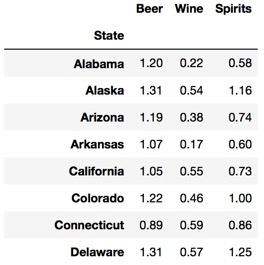
```
import pandas as pd
url='https://raw.githubusercontent.com/JaeyoungKim-HCIL/NPEX_AI_Lecture/main/niaaa-report2009.csv'
alco2009 = pd.read_csv(url, index_col='State')
```

```
Beer       1.72
Wine       1.00
Spirits    1.82
```



In [ ]:
import pandas as pd
url='https://raw.githubusercontent.com/JaeyoungKim-HCIL/NPEX_AI_Lecture/main/niaaa-report2009.csv'
alco2009 = pd.read_csv(url, index_col='State')
alco2009.max(axis=0).head()


Beer       1.72
Wine       1.00
Spirits    1.82
dtype: float64

# (실습) 데이터 집계 함수

* 각 **주**별로 최솟값을 구해보세요.

```
import pandas as pd
url='https://raw.githubusercontent.com/JaeyoungKim-HCIL/NPEX_AI_Lecture/main/niaaa-report2009.csv'
alco2009 = pd.read_csv(url, index_col='State')
```

```
State
Alabama       0.22
Alaska        0.54
Arizona       0.38
Arkansas      0.17
California    0.55
```

In [ ]:
import pandas as pd
url='https://raw.githubusercontent.com/JaeyoungKim-HCIL/NPEX_AI_Lecture/main/niaaa-report2009.csv'
alco2009 = pd.read_csv(url, index_col='State')
alco2009.min(axis=1).head()

State
Alabama       0.22
Alaska        0.54
Arizona       0.38
Arkansas      0.17
California    0.55
dtype: float64

# 데이터 집계 함수

* 전체에 대한 기술 통계값(descriptive statistics)이 필요한 경우 `describe( )` 함수로 한번에 도출 가능


In [ ]:
import pandas as pd
url='https://raw.githubusercontent.com/JaeyoungKim-HCIL/NPEX_AI_Lecture/main/niaaa-report2009.csv'
alco2009 = pd.read_csv(url, index_col='State')
alco2009.describe()

,Beer,Wine,Spirits
count,51.000000,51.000000,51.000000
mean,1.239608,0.384118,0.819804
std,0.210200,0.201139,0.266732
min,0.700000,0.100000,0.450000
25%,1.095000,0.225000,0.660000
50%,1.220000,0.340000,0.740000
75%,1.365000,0.520000,0.880000
max,1.720000,1.000000,1.820000


# 데이터 변환

* 사칙 연산자의 활용

In [ ]:
import pandas as pd
url='https://github.com/JaeyoungKim-HCIL/NPEX_AI_Lecture/blob/main/niaaa-report.xlsx?raw=true'
alco = pd.read_excel(url, sheet_name='niaaa-report', index_col=[0, 1])

alco['Total'] = alco.Wine + alco.Beer + alco.Spirits
#alco['Total'] = alco['Wine'] + alco['Beer'] + alco['Spirits']
alco.head()

Beer  Wine  Spirits  Total
State   Year                            
Alabama 1977  0.99  0.13     0.84   1.96
        1978  0.98  0.12     0.88   1.98
        1979  0.98  0.12     0.84   1.94
        1980  0.96  0.16     0.74   1.86
        1981  1.00  0.19     0.73   1.92

* (참고) 문자열로 된 column명은 위와 같이 사용 가능


# 데이터 변환

* `groupby( )` 함수
   * 각 열의 키 값을 기준으로 행을 그룹으로 묶어 데이터 프레임을 분리 함


In [ ]:
import pandas as pd
url='https://github.com/JaeyoungKim-HCIL/NPEX_AI_Lecture/blob/main/niaaa-report.xlsx?raw=true'
alco = pd.read_excel(url, sheet_name='niaaa-report', index_col=[0, 1])

alco['Total'] = alco.Wine + alco.Beer + alco.Spirits
print(alco)
alco_noidx = alco.reset_index()
sum_alco = alco_noidx.groupby('Year').sum()
print(sum_alco)

              Beer  Wine  Spirits  Total
State   Year                            
Alabama 1977  0.99  0.13     0.84   1.96
        1978  0.98  0.12     0.88   1.98
        1979  0.98  0.12     0.84   1.94
        1980  0.96  0.16     0.74   1.86
        1981  1.00  0.19     0.73   1.92
...            ...   ...      ...    ...
Wyoming 2005  1.21  0.23     0.97   2.41
        2006  1.47  0.23     1.05   2.75
        2007  1.49  0.23     1.10   2.82
        2008  1.54  0.23     1.12   2.89
        2009  1.45  0.22     1.10   2.77

[1683 rows x 4 columns]
       Beer   Wine  Spirits   Total
Year                               
1977  67.92  14.14    59.52  141.58
1978  69.51  15.12    60.08  144.71
1979  71.39  15.72    58.73  145.84
1980  71.73  16.38    57.54  145.65
1981  72.50  16.90    56.33  145.73
1982  71.95  17.17    53.80  142.92
1983  71.73  17.21    52.74  141.68
1984  69.95  17.56    50.90  138.41
1985  69.13  18.09    49.28  136.50
1986  69.63  18.60    45.46  133.69
1987  69.0

# `groupby()` 함수의 응용

* for문의 활용

In [ ]:
import pandas as pd
url='https://github.com/JaeyoungKim-HCIL/NPEX_AI_Lecture/blob/main/niaaa-report.xlsx?raw=true'
alco = pd.read_excel(url, sheet_name='niaaa-report', index_col=[0, 1])

alco['Total'] = alco.Wine + alco.Beer + alco.Spirits
alco_noidx = alco.reset_index()
print(alco)

alco_gby = alco_noidx.groupby('Year')

for year, year_frame in alco_gby:
  print(year)
  print(year_frame[['Beer', 'Wine', 'Spirits', 'Total']])
        

# DataFrame의 이산화

* 히스토그램 작성을 위하여 연속적인 변수를 이산 변수로 변환 가능
   * `cut( )` 함수의 활용

In [ ]:
import pandas as pd
url='https://raw.githubusercontent.com/JaeyoungKim-HCIL/NPEX_AI_Lecture/main/niaaa-report2009.csv'
alco2009 = pd.read_csv(url, index_col='State')
cats = pd.cut(alco2009['Wine'], 3).head()
cats
print('min of Wine', alco2009['Wine'].min())
print('max of Wine', alco2009['Wine'].max())

min of Wine 0.1
max of Wine 1.0


State
Alabama       (0.0991, 0.4]
Alaska           (0.4, 0.7]
Arizona       (0.0991, 0.4]
Arkansas      (0.0991, 0.4]
California       (0.4, 0.7]
Name: Wine, dtype: category
Categories (3, interval[float64]): [(0.0991, 0.4] < (0.4, 0.7] < (0.7, 1.0]]

# DataFrame의 이산화

* 이산화된 구간에 레이블을 붙이고 싶은 경우 `labels` 활용
   * 앞서 지정한 `bin`의 수만큼 리스트에 label을 저장하여 함수 호출


In [ ]:
import pandas as pd
url='https://raw.githubusercontent.com/JaeyoungKim-HCIL/NPEX_AI_Lecture/main/niaaa-report2009.csv'
alco2009 = pd.read_csv(url, index_col='State')
cats = pd.cut(alco2009['Wine'], 3, labels=['Low', 'Moderate', 'Heavy']).head()
cats

State
Alabama            Low
Alaska        Moderate
Arizona            Low
Arkansas           Low
California    Moderate
Name: Wine, dtype: category
Categories (3, object): ['Low' < 'Moderate' < 'Heavy']

* `labels=False`로 지정할 경우, 각 구간의 소속 정보(index)만 반환


In [ ]:
import pandas as pd
url='https://raw.githubusercontent.com/JaeyoungKim-HCIL/NPEX_AI_Lecture/main/niaaa-report2009.csv'
alco2009 = pd.read_csv(url, index_col='State')
cats = pd.cut(alco2009['Wine'], 3, labels=False).head()
cats

State
Alabama       0
Alaska        1
Arizona       0
Arkansas      0
California    1
Name: Wine, dtype: int64

# DataFrame의 이산화

* `bin`을 원하는 크기로 정하고 싶다면
   * Categorization using IntervalIndex

* Passing an `IntervalIndex` for `bins` results in those categories exactly. 
   
* IntervalIndex : Defines the exact bins to be used. Note that IntervalIndex for bins must be non-overlapping.



In [ ]:
import pandas as pd
bins = pd.IntervalIndex.from_tuples([(0, 1), (2, 3), (4, 5)])
pd.cut([0, 0.5, 1.5, 2.5, 4.5], bins)
[NaN, (0.0, 1.0], NaN, (2.0, 3.0], (4.0, 5.0]]
Categories (3, interval[int64]): [(0, 1] < (2, 3] < (4, 5]]

* Notice that values not covered by the IntervalIndex are set to NaN. 
* `0` is to the left of the first bin (which is closed on the right), and 1.5 falls between two bins.


# 데이터 변환 – Mapping

* 가장 일반적인 형태의 데이터 변환

* 사용자가 지정한 함수를 선택한 열의 모든 항목들에 적용

* 전달 가능한 함수
   * Python 내장함수
   * Import한 모듈의 함수
   * 사용자가 정의한 함수
   * 익명 함수 (`lambda` 함수)

# (실습) 데이터 변환 – Mapping

* 각 주별로 세글자 약어 부여하기 

* 아래의 예제에서는 `Lambda` 함수 활용


In [ ]:
import pandas as pd
url='https://raw.githubusercontent.com/JaeyoungKim-HCIL/NPEX_AI_Lecture/main/niaaa-report2009.csv'
alco2009 = pd.read_csv(url, index_col='State')
with_state = alco2009.reset_index()
abbrevs = with_state['State'].map(lambda x: x[:3].upper())
abbrevs

0     ALA
1     ALA
2     ARI
3     ARK
4     CAL
5     COL
6     CON
7     DEL
8     DIS
9     FLO
10    GEO
11    HAW
12    IDA
13    ILL
14    IND
15    IOW
16    KAN
17    KEN
18    LOU
19    MAI
20    MAR
21    MAS
22    MIC
23    MIN
24    MIS
25    MIS
26    MON
27    NEB
28    NEV
29    NEW
30    NEW
31    NEW
32    NEW
33    NOR
34    NOR
35    OHI
36    OKL
37    ORE
38    PEN
39    RHO
40    SOU
41    SOU
42    TEN
43    TEX
44    UTA
45    VER
46    VIR
47    WAS
48    WES
49    WIS
50    WYO
Name: State, dtype: object

# 데이터 변화 - 교차 집계

* 교차 집계(Cross-tabulation)
   * 각 그룹별 빈도를 산출하고, 서로 다른 두 카테고리 변수를 표현하는 행과 열로 된 DataFrame 반환


In [ ]:
import pandas as pd
url='https://raw.githubusercontent.com/JaeyoungKim-HCIL/NPEX_AI_Lecture/main/niaaa-report2009.csv'
alco2009 = pd.read_csv(url, index_col='State')
with_state = alco2009.reset_index()
wine_state = alco2009['Wine'] > alco2009['Wine'].mean()
beer_state = alco2009['Beer'] > alco2009['Beer'].mean()
print(wine_state.head())
print(beer_state.head())
pd.crosstab(wine_state, beer_state)

State
Alabama       False
Alaska         True
Arizona       False
Arkansas      False
California     True
Name: Wine, dtype: bool
State
Alabama       False
Alaska         True
Arizona       False
Arkansas      False
California    False
Name: Beer, dtype: bool


Beer,False,True
Wine,,
False,14,15
True,12,10


# Summary

* 스택킹(stacking)과 피보팅(pivoting)
* 데이터 결합과 조인
* 데이터 정렬
* 데이터 집계 함수
* 데이터 변환